In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

%matplotlib inline

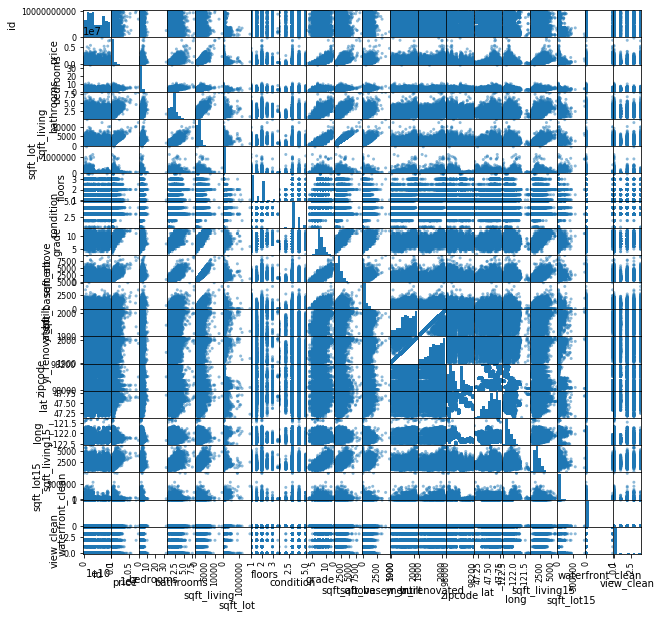

In [3]:
df = pd.read_csv('clean_ohe.csv')

In [19]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'waterfront_clean', 'view_clean',
       'zipcode_98001', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_9

In [7]:
df.corr()['price'].sort_values(ascending=False)

price               1.000000
sqft_living         0.701917
grade               0.667951
sqft_above          0.605368
sqft_living15       0.585241
bathrooms           0.525906
view_clean          0.393497
sqft_basement       0.321108
bedrooms            0.308787
lat                 0.306692
zipcode_98004       0.271184
waterfront_clean    0.264306
floors              0.256804
zipcode_98039       0.212561
zipcode_98040       0.204952
zipcode_98112       0.169957
zipcode_98006       0.133677
zipcode_98033       0.102551
yr_renovated        0.097541
zipcode_98105       0.091003
sqft_lot            0.089876
zipcode_98075       0.088634
zipcode_98199       0.083688
sqft_lot15          0.082845
zipcode_98119       0.078077
zipcode_98102       0.068037
zipcode_98109       0.065875
zipcode_98005       0.065075
zipcode_98074       0.057136
yr_built            0.053953
                      ...   
zipcode_98028      -0.024406
zipcode_98125      -0.026613
zipcode_98045      -0.027633
zipcode_98019 

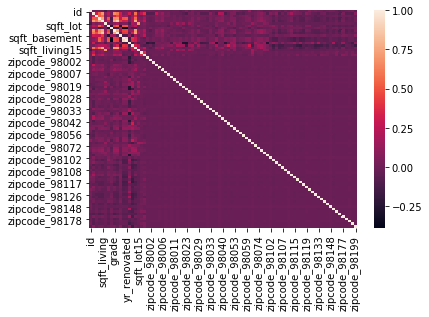

In [18]:
correlations = df.corr()
sns.heatmap(correlations)

In [20]:
df_nozip = df.loc[: , 'price':'view_clean']

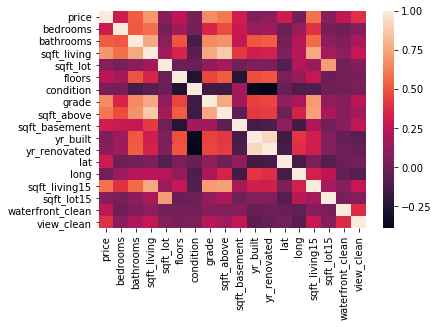

In [21]:
sns.heatmap(df_nozip.corr())

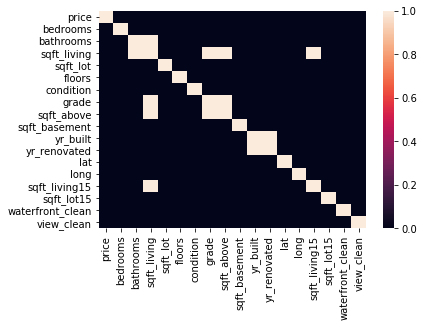

In [24]:
sns.heatmap(df_nozip.corr() > .75)

highly correlated: sqft living & sqft_living15, sqft_above, grade, bathrooms
                    sqft above & grade
                    yr_built and yr rennovated

In [28]:
#removing bedrooms = 33
df.loc[df['bedrooms'] > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,5,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
df.drop(index=15856, inplace=True) #idk how to do this more elegantly
df.loc[df['bedrooms'] > 20]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199


In [33]:
df['bedrooms'].nunique()

11

(array([1.960e+02, 2.760e+03, 9.824e+03, 6.882e+03, 1.601e+03, 2.720e+02,
        3.800e+01, 1.300e+01, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        ]),
 <a list of 11 Patch objects>)

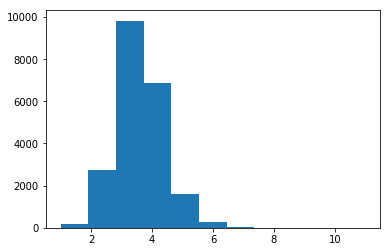

In [34]:
plt.hist(df['bedrooms'], bins= 11)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


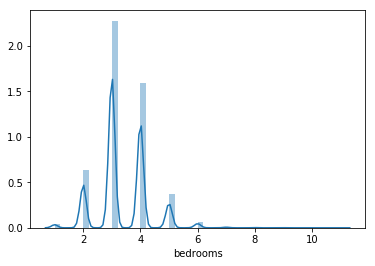

In [35]:
sns.distplot(df['bedrooms'])

In [36]:
df.to_csv('clean_ohe2.csv')